number of images: 2184
69/69 [==============================] - 191s 3s/step
number of image features: 8945664
Searched Style


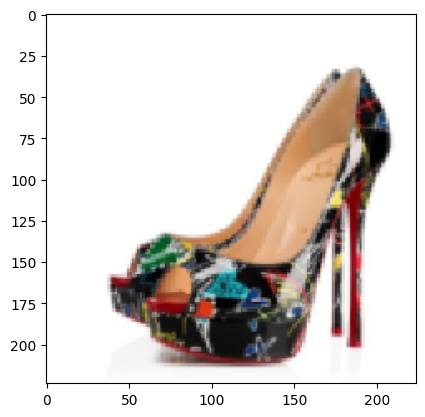

Recommended Styles


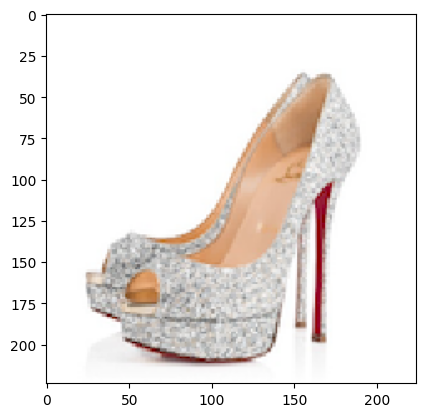

similarity score :  0.7434685


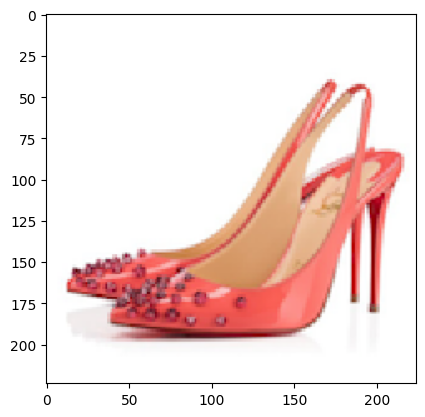

similarity score :  0.7368386


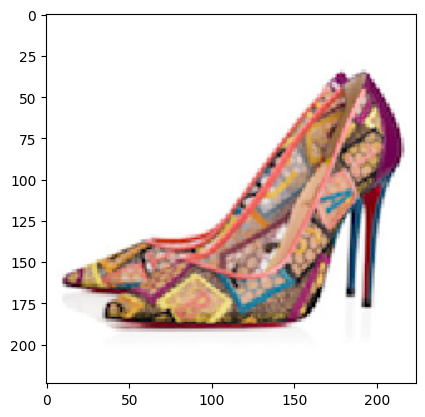

similarity score :  0.7283382


In [2]:
import sys
import os
from PIL import Image
from keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import vgg16
from keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

#Path of the dataset
path = "styles/"
#https://docs.python.org/3/library/pathlib.html
images_file = [path + x for x in os.listdir(path) if "png" in x]
print("number of images:",len(images_file))

#https://www.kaggle.com/olgabelitskaya
def Load_data(img_name):
    image_all = []
    for image in images_file:
        img_initial = load_img(image,target_size=(224, 224))
        #convert image to array
        image_array = img_to_array(img_initial)
        #convert image to batch
        image_np = np.expand_dims(image_array, axis=0)

        image_all.append(image_np)
    images = np.vstack(image_all)
    processed_image = preprocess_input(images.copy())

    return processed_image

data = Load_data(images_file[0])


#https://www.kaggle.com/code/olgabelitskaya/style-images-keras-applications
def Load_Vgg():
    vg_model = vgg16.VGG16(weights='imagenet')
    # Remove the last layers in order to get featureS
    extractor = Model(inputs=vg_model.input, outputs=vg_model.get_layer("fc2").output)
    return extractor

#https://www.kaggle.com/code/olgabelitskaya/style-images-keras-applications
def Extraction():
    # Extract the features
    image_features = Load_Vgg().predict(data)
    print("number of image features:",image_features.size)
    return image_features

#https://www.kaggle.com/code/olgabelitskaya/product-recognition
def computeSimilarity():
    # compute cosine similarity using sklearn
    compute_similar = cosine_similarity(Extraction())
    # Arrange the similarity as a pandas dataframe
    compute_similar_pd = pd.DataFrame(compute_similar, columns=images_file, index=images_file)
    return compute_similar_pd

com_pd=computeSimilarity()

recommended_styles = 3

#https://colab.research.google.com/drive/1r5yRD-3tQwN6lSql_VRoVuwQ8DaY5zUt#scrollTo=SSCAoE8o1GPD
def recommended_products(image):
    print("Searched Style")
    img_initial = load_img(image,target_size=(224, 224))
    plt.imshow(img_initial)
    plt.show()

    print("Recommended Styles")
    #Get similar styles based on cosine similarity
    similar_images = com_pd[image].sort_values(ascending=False)[1:recommended_styles+1].index
    similar_images_scores = com_pd[image].sort_values(ascending=False)[1:recommended_styles+1]
    n = len(similar_images)
    for i in range(0,n):
        img_initial = load_img(similar_images[i],target_size=(224, 224))
        plt.imshow(img_initial)
        plt.show()
        print("similarity score : ",similar_images_scores[i])

recommended_products(images_file[0])